In [4]:
pip install timm==0.9.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.8 MB/s eta 0:00:0000:01
  Attempting uninstall: timm
    Found existing installation: timm 1.0.15
    Uninstalling timm-1.0.15:
      Successfully uninstalled timm-1.0.15
Note: you may need to restart the kernel to use updated packages.


Train: 717 images | Val: 178 images


model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Train:   0%|          | 0/45 [00:00<?, ?it/s]

/tmp/ipykernel_36/1351908955.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imgs, labels = imgs.to(DEVICE), torch.tensor(labels).to(DEVICE)


Val:   0%|          | 0/12 [00:00<?, ?it/s]

/tmp/ipykernel_36/1351908955.py:105: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imgs, labels = imgs.to(DEVICE), torch.tensor(labels).to(DEVICE)


Epoch 1/15: Train Acc=65.97%, Val Acc=82.02%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 2/15: Train Acc=85.36%, Val Acc=91.57%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 3/15: Train Acc=91.91%, Val Acc=91.57%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 4/15: Train Acc=95.68%, Val Acc=93.82%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 5/15: Train Acc=97.91%, Val Acc=91.57%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 6/15: Train Acc=97.77%, Val Acc=95.51%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 7/15: Train Acc=99.58%, Val Acc=95.51%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 8/15: Train Acc=99.58%, Val Acc=95.51%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 9/15: Train Acc=100.00%, Val Acc=95.51%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 10/15: Train Acc=100.00%, Val Acc=96.07%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 11/15: Train Acc=100.00%, Val Acc=94.94%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 12/15: Train Acc=100.00%, Val Acc=96.07%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 13/15: Train Acc=99.86%, Val Acc=95.51%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 14/15: Train Acc=100.00%, Val Acc=95.51%


Train:   0%|          | 0/45 [00:00<?, ?it/s]

Val:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 15/15: Train Acc=100.00%, Val Acc=95.51%

Best Validation Accuracy: 96.07%

Classification Report:
                               precision    recall  f1-score   support

            normal_esophagus       0.93      0.98      0.95        42
esophageal_protruded_lesions       0.97      0.97      0.97        36
                 esophagitis       1.00      0.84      0.91        25
           barrett_esophagus       0.93      0.93      0.93        15
           esophageal_cancer       0.97      1.00      0.98        60

                    accuracy                           0.96       178
                   macro avg       0.96      0.94      0.95       178
                weighted avg       0.96      0.96      0.96       178



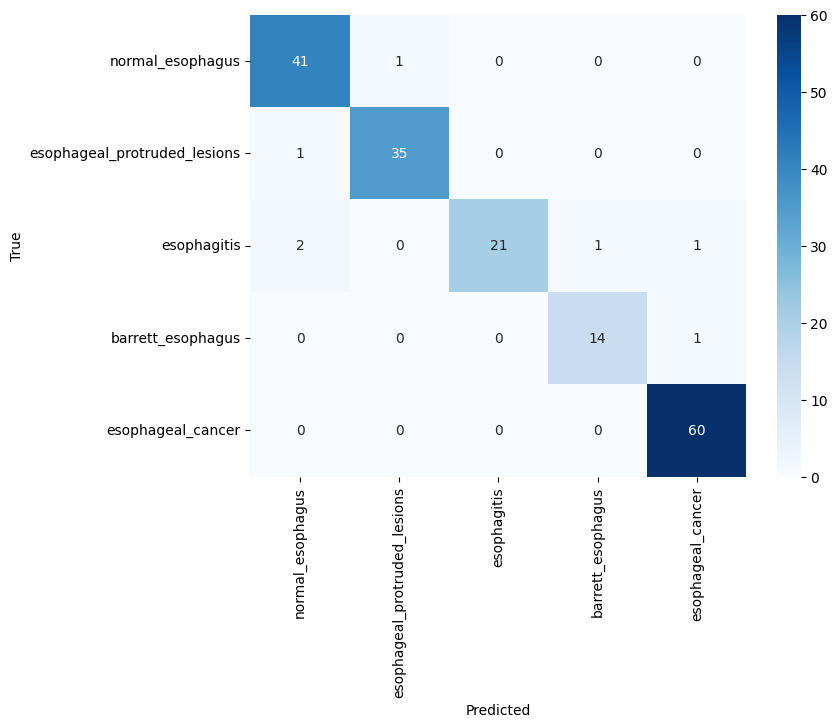

In [5]:
# --- 1. SETUP ---
!pip install -q timm pandas seaborn

import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.v2 as transforms
from PIL import Image
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tqdm.notebook import tqdm
import timm

# --- 2. CONFIGURATION ---
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 15
LEARNING_RATE = 3e-5

RAW_PATH = "/kaggle/input/capstone-dataset/dataset/images"
SPLIT_PATH = "/kaggle/input/capstone-dataset/dataset/splits"

mean = [0.1916, 0.1211, 0.1125]
std = [0.0726, 0.0609, 0.0563]
classes = {
    'normal_esophagus': 0,
    'esophageal_protruded_lesions': 1,
    'esophagitis': 2,
    'barrett_esophagus': 3,
    'esophageal_cancer': 4,
}
class_names = list(classes.keys())
class_num = len(classes)

train_transform = transforms.Compose([
    transforms.Resize([IMG_SIZE, IMG_SIZE]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.2,0.2,0.2,0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
val_transform = transforms.Compose([
    transforms.Resize([IMG_SIZE, IMG_SIZE]),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

# --- 3. DATASET CLASS ---
class EsophagusDataset(Dataset):
    def __init__(self, raw_path, split_path, task, is_train=True):
        self.raw_path = raw_path
        self.transform = train_transform if is_train else val_transform
        self.image_files = []
        for cl_name, label in classes.items():
            split_file = os.path.join(split_path, cl_name, task + ".csv")
            if not os.path.exists(split_file): continue
            with open(split_file) as f:
                reader = csv.reader(f)
                for row in reader:
                    img_path = os.path.join(raw_path, cl_name, row[0])
                    if os.path.exists(img_path):
                        self.image_files.append((img_path, label))
    def __len__(self): return len(self.image_files)
    def __getitem__(self, idx):
        path, label = self.image_files[idx]
        image = Image.open(path).convert("RGB")
        return self.transform(image), label

# --- 4. MODEL (CoAtNet, better than PVT) ---
def create_model(model_name="coatnet_1_rw_224", num_classes=class_num):
    model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
    return model.to(DEVICE)

# --- 5. TRAINING LOOP ---
def train_one_epoch(model, loader, criterion, optimizer):
    model.train()
    running_loss, correct, total = 0, 0, 0
    for imgs, labels in tqdm(loader, desc="Train", leave=False):
        imgs, labels = imgs.to(DEVICE), torch.tensor(labels).to(DEVICE)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*imgs.size(0)
        _, pred = outputs.max(1)
        correct += (pred==labels).sum().item()
        total += labels.size(0)
    return running_loss/total, correct/total*100

def evaluate(model, loader, criterion):
    model.eval()
    running_loss, correct, total = 0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in tqdm(loader, desc="Val", leave=False):
            imgs, labels = imgs.to(DEVICE), torch.tensor(labels).to(DEVICE)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()*imgs.size(0)
            _, pred = outputs.max(1)
            correct += (pred==labels).sum().item()
            total += labels.size(0)
            all_preds.extend(pred.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return running_loss/total, correct/total*100, all_preds, all_labels

# --- 6. DATA LOADING ---
train_dataset = EsophagusDataset(RAW_PATH, SPLIT_PATH, "train0", is_train=True)
val_dataset = EsophagusDataset(RAW_PATH, SPLIT_PATH, "val0", is_train=False)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print(f"Train: {len(train_dataset)} images | Val: {len(val_dataset)} images")

# --- 7. TRAIN + EVALUATE ---
model = create_model("coatnet_1_rw_224")
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

best_acc, best_preds, best_labels = 0, [], []
for epoch in range(EPOCHS):
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer)
    val_loss, val_acc, preds, labels = evaluate(model, val_loader, criterion)
    scheduler.step()
    print(f"Epoch {epoch+1}/{EPOCHS}: Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")
    if val_acc > best_acc:
        best_acc, best_preds, best_labels = val_acc, preds, labels

# --- 8. RESULTS ---
print("\nBest Validation Accuracy: {:.2f}%".format(best_acc))
print("\nClassification Report:\n", classification_report(best_labels, best_preds, target_names=class_names))

cm = confusion_matrix(best_labels, best_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [7]:
import os
import torch

MODEL_DIR = "/kaggle/working"   # Kaggle's writable directory
os.makedirs(MODEL_DIR, exist_ok=True)

# Save the trained model (replace model_name if needed)
final_model_path = os.path.join(MODEL_DIR, f"coatnet_final.pth")
torch.save(model.state_dict(), final_model_path)

print(f"✅ Model saved at: {final_model_path}")


✅ Model saved at: /kaggle/working/coatnet_final.pth


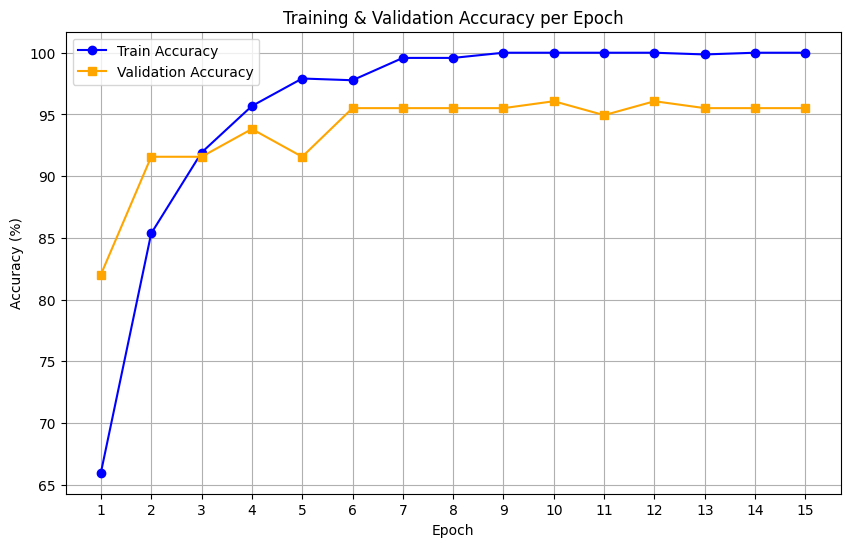

In [11]:
import matplotlib.pyplot as plt

# Training & Validation Accuracies per epoch (from your logs)
train_acc = [65.97, 85.36, 91.91, 95.68, 97.91, 97.77, 99.58, 99.58, 100.00, 100.00, 100.00, 100.00, 99.86, 100.00, 100.00]
val_acc   = [82.02, 91.57, 91.57, 93.82, 91.57, 95.51, 95.51, 95.51, 95.51, 96.07, 94.94, 96.07, 95.51, 95.51, 95.51]

epochs = range(1, len(train_acc)+1)

plt.figure(figsize=(10,6))
plt.plot(epochs, train_acc, 'o-', label='Train Accuracy', color='blue')
plt.plot(epochs, val_acc, 's-', label='Validation Accuracy', color='orange')
plt.title("Training & Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.xticks(epochs)
plt.grid(True)
plt.legend()
plt.show()


In [12]:
best_fold_val_accs = [82.02, 91.57, 91.57, 93.82, 91.57, 95.51, 95.51, 95.51, 95.51, 96.07, 94.94, 96.07, 95.51, 95.51, 95.51]
average_val_acc = sum(best_fold_val_accs) / len(best_fold_val_accs)
print(f"Average Validation Accuracy for Best Fold: {average_val_acc:.2f}%")

Average Validation Accuracy for Best Fold: 93.75%
